Part 9 Version 2  
Larger datasets with output plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data, spiral_data

In [2]:
nnfs.init()

In [3]:
X, y = vertical_data(samples=500, classes=3)

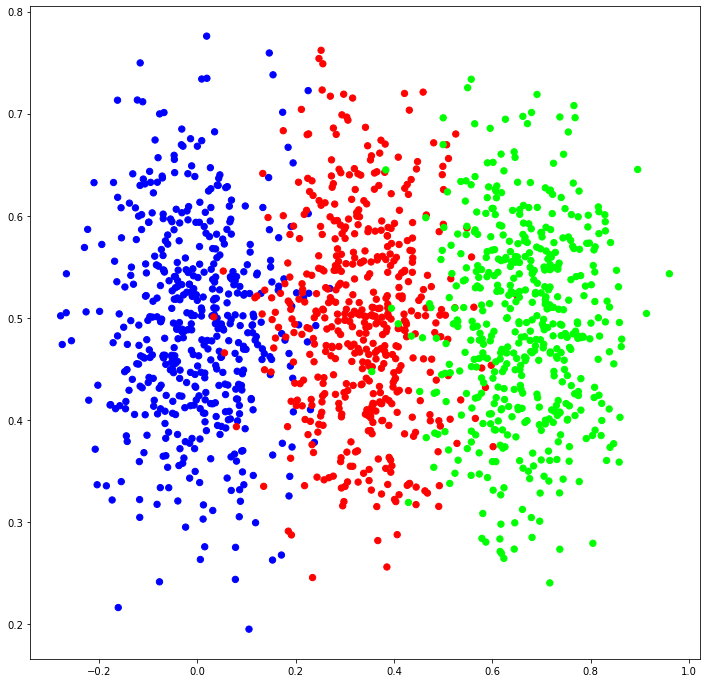

In [9]:
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [5]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

    
# catagorical cross entropy
class Loss_CatCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred, 1e-7, 1-1e-7)
        
        # for one hot encoded vectors
        if len(y_true.shape) == 1:
            correct_conf = y_pred_clip[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_conf = np.sum(y_pred_clip*y_true, axis=1)
            
        negative_log_likelihood = -np.log(correct_conf)
        return negative_log_likelihood

In [6]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CatCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()

best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [7]:
iter_list = []
loss_list = []
accr_list = []

for iteration in range(500000):
    
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        
        print('New set of weights found, iteration', iteration,
              'loss:', loss, 'accuracy', accuracy)
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
        iter_list.append(iteration)
        loss_list.append(loss)
        accr_list.append(accuracy)
        
    else:
        
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration 0 loss: 1.1025486 accuracy 0.3333333333333333
New set of weights found, iteration 1 loss: 1.1009333 accuracy 0.3333333333333333
New set of weights found, iteration 5 loss: 1.1004109 accuracy 0.22466666666666665
New set of weights found, iteration 6 loss: 1.0996058 accuracy 0.3333333333333333
New set of weights found, iteration 9 loss: 1.0986971 accuracy 0.3333333333333333
New set of weights found, iteration 10 loss: 1.096353 accuracy 0.3333333333333333
New set of weights found, iteration 13 loss: 1.0957227 accuracy 0.3333333333333333
New set of weights found, iteration 15 loss: 1.0936863 accuracy 0.3333333333333333
New set of weights found, iteration 17 loss: 1.0910667 accuracy 0.3333333333333333
New set of weights found, iteration 19 loss: 1.0906835 accuracy 0.3333333333333333
New set of weights found, iteration 21 loss: 1.0900483 accuracy 0.3333333333333333
New set of weights found, iteration 28 loss: 1.0833329 accuracy 0.34933333333333333
New set 

New set of weights found, iteration 486 loss: 0.40579548 accuracy 0.9366666666666666
New set of weights found, iteration 490 loss: 0.40230674 accuracy 0.9353333333333333
New set of weights found, iteration 493 loss: 0.39958745 accuracy 0.9226666666666666
New set of weights found, iteration 494 loss: 0.39794034 accuracy 0.9186666666666666
New set of weights found, iteration 497 loss: 0.39304936 accuracy 0.9286666666666666
New set of weights found, iteration 499 loss: 0.3927744 accuracy 0.922
New set of weights found, iteration 500 loss: 0.39234456 accuracy 0.9046666666666666
New set of weights found, iteration 501 loss: 0.38939872 accuracy 0.9206666666666666
New set of weights found, iteration 505 loss: 0.3893878 accuracy 0.9106666666666666
New set of weights found, iteration 514 loss: 0.38897395 accuracy 0.9193333333333333
New set of weights found, iteration 516 loss: 0.38725457 accuracy 0.912
New set of weights found, iteration 519 loss: 0.38541177 accuracy 0.92
New set of weights fou

New set of weights found, iteration 1034 loss: 0.20062801 accuracy 0.9366666666666666
New set of weights found, iteration 1039 loss: 0.19980517 accuracy 0.934
New set of weights found, iteration 1084 loss: 0.19968799 accuracy 0.936
New set of weights found, iteration 1092 loss: 0.19958912 accuracy 0.9386666666666666
New set of weights found, iteration 1095 loss: 0.19794697 accuracy 0.9373333333333334
New set of weights found, iteration 1109 loss: 0.19633111 accuracy 0.9406666666666667
New set of weights found, iteration 1110 loss: 0.19513999 accuracy 0.9353333333333333
New set of weights found, iteration 1111 loss: 0.19388403 accuracy 0.936
New set of weights found, iteration 1114 loss: 0.19307373 accuracy 0.936
New set of weights found, iteration 1116 loss: 0.19272372 accuracy 0.9366666666666666
New set of weights found, iteration 1117 loss: 0.19171996 accuracy 0.9373333333333334
New set of weights found, iteration 1122 loss: 0.18936512 accuracy 0.934
New set of weights found, iterati

New set of weights found, iteration 5114 loss: 0.1528841 accuracy 0.9393333333333334
New set of weights found, iteration 8161 loss: 0.1528818 accuracy 0.9413333333333334
New set of weights found, iteration 8226 loss: 0.15286817 accuracy 0.9406666666666667
New set of weights found, iteration 9943 loss: 0.15285619 accuracy 0.94
New set of weights found, iteration 16524 loss: 0.15284307 accuracy 0.94
New set of weights found, iteration 18993 loss: 0.15283656 accuracy 0.9413333333333334
New set of weights found, iteration 22546 loss: 0.15283278 accuracy 0.9393333333333334
New set of weights found, iteration 23873 loss: 0.15283173 accuracy 0.94
New set of weights found, iteration 39964 loss: 0.15283147 accuracy 0.9406666666666667
New set of weights found, iteration 49125 loss: 0.15282239 accuracy 0.94
New set of weights found, iteration 49172 loss: 0.15281129 accuracy 0.9393333333333334
New set of weights found, iteration 49860 loss: 0.15279229 accuracy 0.94
New set of weights found, iterat

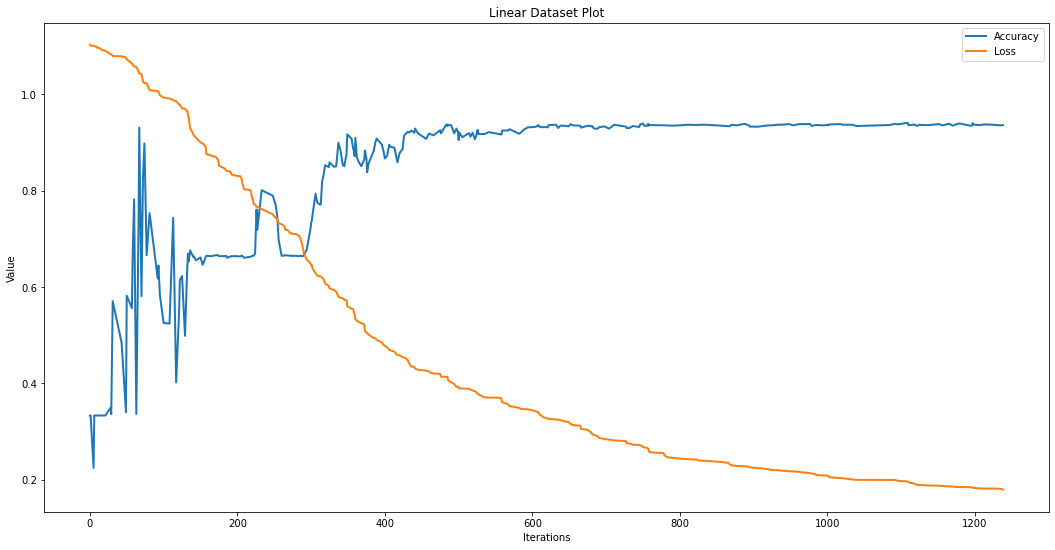

In [32]:
plt.figure(figsize=(18, 9))
x1 = iter_list[:300]
y1 = accr_list[:300]
plt.plot(x1, y1, label = "Accuracy", linewidth='2')


x2 = iter_list[:300]
y2 = loss_list[:300]
plt.plot(x2, y2, label = "Loss", linewidth='2')


plt.xlabel('Iterations')
plt.ylabel('Value')


plt.title('Linear Dataset Plot')
plt.legend()
plt.show()

In [33]:
max(accr_list)

0.9413333333333334

In [34]:
min(loss_list)

0.15272297

In [38]:
X, y = spiral_data(samples=1000, classes=3)

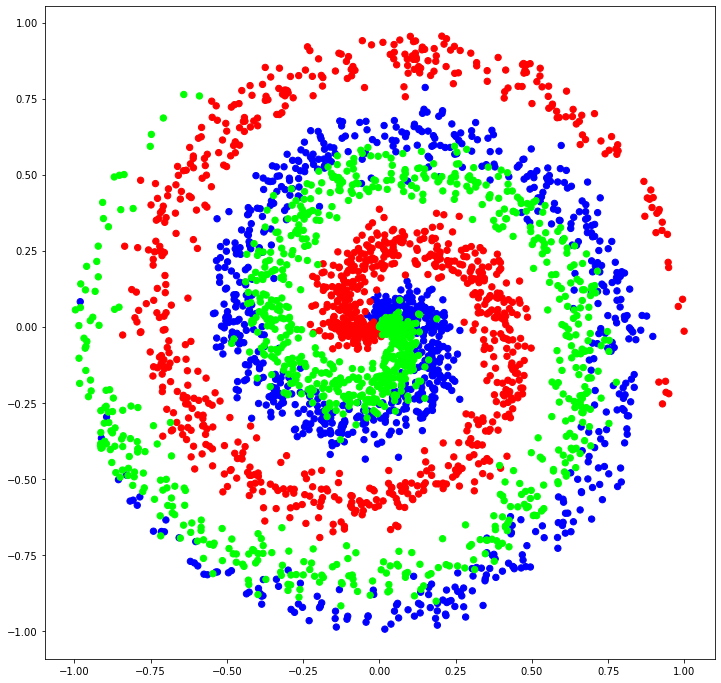

In [39]:
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [41]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

        
class Activation_Softmax:
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        
class Loss:
    
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

    
# catagorical cross entropy
class Loss_CatCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred, 1e-7, 1-1e-7)
        
        # for one hot encoded vectors
        if len(y_true.shape) == 1:
            correct_conf = y_pred_clip[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_conf = np.sum(y_pred_clip*y_true, axis=1)
            
        negative_log_likelihood = -np.log(correct_conf)
        return negative_log_likelihood

In [42]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CatCrossEntropy()

lowest_loss = 9999999

best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()

best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [43]:
iter_list = []
loss_list = []
accr_list = []

for iteration in range(500000):
    
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        
        print('New set of weights found, iteration', iteration,
              'loss:', loss, 'accuracy', accuracy)
        
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        
        lowest_loss = loss
        
        iter_list.append(iteration)
        loss_list.append(loss)
        accr_list.append(accuracy)
        
    else:
        
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration 0 loss: 1.0979422 accuracy 0.3333333333333333
New set of weights found, iteration 1 loss: 1.0978171 accuracy 0.37
New set of weights found, iteration 4 loss: 1.0975657 accuracy 0.3333333333333333
New set of weights found, iteration 6 loss: 1.0975254 accuracy 0.3333333333333333
New set of weights found, iteration 7 loss: 1.0972751 accuracy 0.37266666666666665
New set of weights found, iteration 13 loss: 1.0971621 accuracy 0.3343333333333333
New set of weights found, iteration 22 loss: 1.0965109 accuracy 0.37333333333333335
New set of weights found, iteration 24 loss: 1.0958813 accuracy 0.37233333333333335
New set of weights found, iteration 30 loss: 1.0957783 accuracy 0.3616666666666667
New set of weights found, iteration 34 loss: 1.094557 accuracy 0.37033333333333335
New set of weights found, iteration 37 loss: 1.0931873 accuracy 0.38966666666666666
New set of weights found, iteration 40 loss: 1.0930148 accuracy 0.35933333333333334
New set of weights

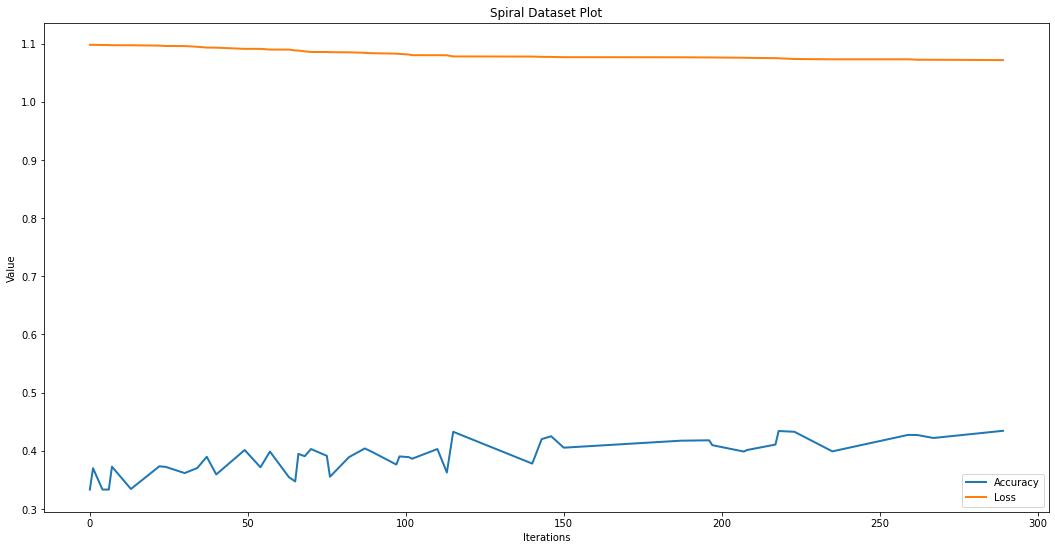

In [49]:
plt.figure(figsize=(18, 9))
x1 = iter_list[:50]
y1 = accr_list[:50]
plt.plot(x1, y1, label = "Accuracy", linewidth='2')


x2 = iter_list[:50]
y2 = loss_list[:50]
plt.plot(x2, y2, label = "Loss", linewidth='2')


plt.xlabel('Iterations')
plt.ylabel('Value')


plt.title('Spiral Dataset Plot')
plt.legend()
plt.show()

In [50]:
max(accr_list)

0.43433333333333335

In [51]:
min(loss_list)

1.0693071